### case 1

In [ ]:
You have given a classified dataset from a company. They have hidden the feature column names but given you the data and the
target classes. We will try to use KNN to create a model that directly predicts a class for a new data point based on features.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [28]:
df = pd.read_csv('Classified Data', index_col=0)      # index_col=0 : for column names 
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### feature scaling dataset

In [29]:
from sklearn.preprocessing import StandardScaler              

scaler = StandardScaler()                         # we do scaling on independent feature

In [30]:
scaler.fit(df.drop('TARGET CLASS', axis=1))         # dropping 'TARGET CLASS' it is dependent feature  and fitting data  

scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))      # transform

In [31]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])   # [:-1] skips the last column and takes all 

### train-test split the dataset

In [32]:
from sklearn.model_selection import train_test_split       

X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'], test_size=0.30)

## KNN model

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)     # initally taking K=1

#### K value will be selected by considering error rate , for which we create graph of K and error , at some point value of K on which error rate become constant that K value we will take.

In [34]:
knn.fit(X_train, y_train)     # fitting

y_pred = knn.predict(X_test)    # predicting

## Predictions and Evaluations 
##### How good model is predicted we compare it

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [36]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[146  14]
 [ 13 127]]
0.91


In [37]:
print(classification_report(y_test, y_pred))      # see precision, recall, f1-score

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       160
           1       0.90      0.91      0.90       140

   micro avg       0.91      0.91      0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



## How to choose  K - value

#### Create error list based on different K-values , we put K-values in error list

In [38]:
error_rate=[]

for i in range(1,40):            # K= 1 to 40
    
    knn = KNeighborsClassifier(n_neighbors=i)   # i=1 to 40
    knn.fit(X_train, y_train)    # fit values K
    pred_i = knn.predict(X_test)  # predict
    error_rate.append(np.mean(pred_i != y_test))   # we append those values 'predict value != to y_test' , then find mean of it

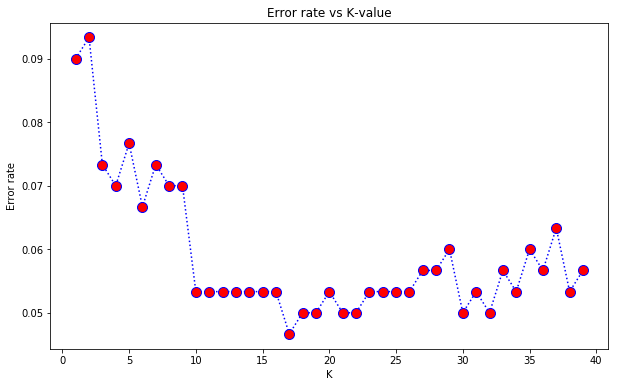

In [39]:
plt.figure(figsize=(10,6))                                                # after finding mean, we plot
plt.plot(range(1,40), error_rate, color='blue', linestyle='dotted',        # range(1,40) : K (x-value) ,  error_rate : (y-value)
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K-value')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()                              # see : at K=23,24  error rate is floating we take this.

In [40]:
# Now we agian fit with K=23 value

knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print('With K-value = 23')
print('Confusion matrix :\n',confusion_matrix(y_test, y_pred))   # Above we have  K=1    , accuracy = 91 %
print(f'\nAccuracy is : {acc:.2%}')
# print(classification_report(y_test, y_pred))

With K-value = 23
Confusion matrix :
 [[149  11]
 [  5 135]]

Accuracy is : 94.67%


# ------------------------------------------------------------------------------

## case 2 

#### Here we are taking the diabetes dataset, downloaded from  Kaggle.

In [41]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [42]:
df = pd.read_csv('D:/Data/diabetes.csv')                               
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [43]:
# Now we replace zero from columns with mean value of the column

zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.NaN)     # 1st 0 inot NaN
    mean = int(df[column].mean(skipna=True))       # calculate mean of the column 
    df[column] = df[column].replace(np.NaN, mean)  # replace NaN with mean

In [44]:
# Now split the dataset into  train and test

X = df.iloc[:, 0:8]   # all rows , 0 to 8 column
y = df.iloc[:, 8]     # all rows , only last 8 column
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [45]:
# Feature Scaling

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [46]:
# Define the model : init K-NN

classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean') 
# n_neighbors here is : K ,   p : is the power parameter to define the metric used which is Euclidean 


# fit model 
classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [50]:
# Predict the test set results 

y_pred = classifier.predict(X_test)

In [53]:
cm = confusion_matrix(y_test, y_pred)
acc2 = accuracy_score(y_test, y_pred)

print('f1-score is :', f1_score(y_test, y_pred))
print('Confusion matrix : \n', cm)
print(f'\nAccuracy is : {acc2:.2%}')

f1-score is : 0.6583333333333334
Confusion matrix : 
 [[239  33]
 [ 49  79]]

Accuracy is : 79.50%
